In [7]:
from mat4py import loadmat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline
from scipy.stats import t
from distfit import distfit

In [2]:
powerdata_path = r"./data/siemens/hourly_avg_wind_speed_and_power.mat"
pricedata_path = r"./data/siemens/da_price_data_dk1_10AM.csv"

powerdata_dict_list = loadmat(powerdata_path, meta=False)
pricedata = pd.read_csv(pricedata_path)
pricedata = pricedata[['nominal', 'forecast']]
pricedata.dropna(inplace=True)
pricedata['error'] = pricedata['forecast'] - pricedata['nominal']

# Get data out of singleton lists
powerdata_dict = {}
for key in powerdata_dict_list.keys():
    powerdata_dict[key] = [l[0] for l in powerdata_dict_list[key]]
powerdata = pd.DataFrame(powerdata_dict)

In [ ]:
nominal_power = 3000
powerdata['error_wp'] = powerdata['hourly_avg_FC_wp'] - powerdata['hourly_avg_RE_wp']
powerdata.describe()

## Generate production forecasts

### Fitting

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.00 sec] [RSS: 0.0840177] [loc=-0.091 scale=1.667]
[distfit] >[expon     ] [0.0 sec] [RSS: 0.610545] [loc=-7.645 scale=7.554]
[distfit] >[pareto    ] [0.00 sec] [RSS: 0.610545] [loc=-1073741831.645 scale=1073741824.000]
[distfit] >[dweibull  ] [0.04 sec] [RSS: 0.0467149] [loc=-0.083 scale=1.236]
[distfit] >[t         ] [0.22 sec] [RSS: 0.0388812] [loc=-0.037 scale=1.143]
[distfit] >[genextreme] [0.26 sec] [RSS: 0.118031] [loc=-0.744 scale=1.745]
[distfit] >[gamma     ] [0.14 sec] [RSS: 0.084611] [loc=-140.896 scale=0.020]
[distfit] >[lognorm   ] [0.31 sec] [RSS: 0.0843918] [loc=-198.140 scale=198.046]
[distfit] >[beta      ] [0.11 sec] [RSS: 0.0840174] [loc=-2863.332 scale=5302.058]
[distfit] >[uniform   ] [0.0 sec] [RSS: 0.505342] [loc=-7.645 scale=15.030]
[distfit] >[loggamma  ] [0.11 sec] [RSS: 0.0838503] [loc=-385.252 scale=55.090]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


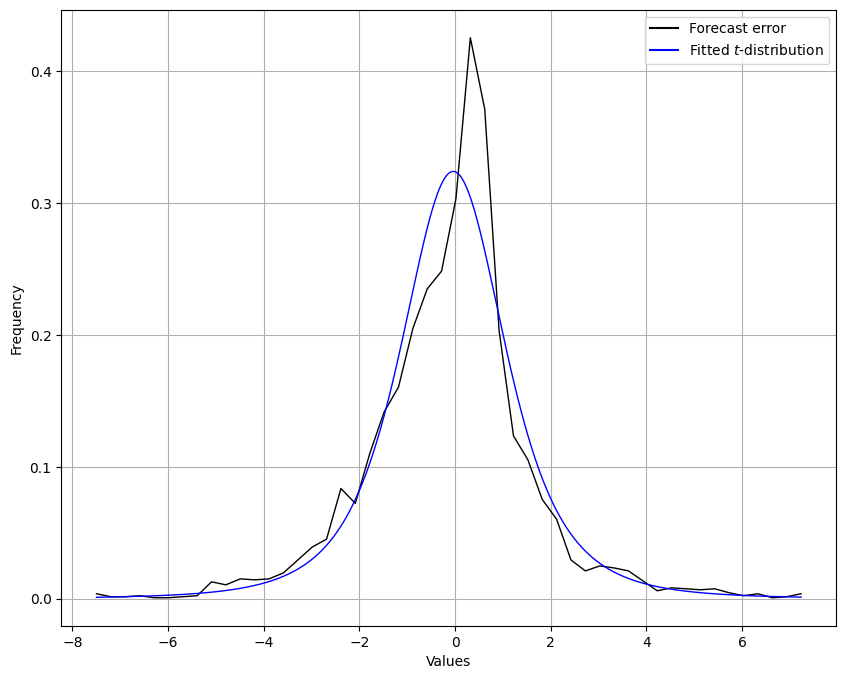

In [15]:

# Initialize model
dist = distfit()

# Find best theoretical distribution for empirical data X
dist.fit_transform(powerdata['error_wp']/3000*10)
fig, ax = dist.plot()

ax.lines[-1].remove()
ax.lines[-1].remove()
l1 = Line2D([0], [0], color='black', label="Forecast error")
l2 = Line2D([0], [0], color='blue', label="Fitted $t$-distribution")
handles = [l1, l2]
ax.legend(handles=handles)
ax.set_title("")
fig.savefig("prod_fit.pdf")

# Make plot
# fig, ax = dist.plot_summary()
# ax.set_title("")
# ax.set_ylabel("Residuam Sum of Squares (RSS)")
# fig.savefig("plot_summary.pdf") 

### Generating

[distfit] >Generate 17520 t distributed samples with fitted params (3.346520649020492, -0.0367887558768704, 1.1431553277793152).


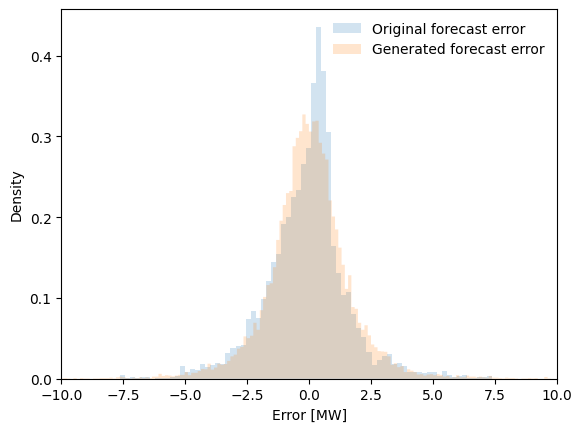

In [11]:
fig, ax = plt.subplots(1, 1)

ax.hist(powerdata['error_wp']/3000*10, density=True, bins='auto', histtype='stepfilled', alpha=0.2, label="Original forecast error")
ax.hist(dist.generate(2*8760), density=True, bins='auto', histtype='stepfilled', alpha=0.2, label="Generated forecast error")
ax.set_xlim([-10, 10])
ax.legend(loc='best', frameon=False)
ax.set_xlabel("Error [MW]")
ax.set_ylabel("Density")
# fig.savefig("production_forecast_error.pdf")
plt.show()

## Generate price forecasts

### Fitting

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.0 sec] [RSS: 0.000322503] [loc=1.171 scale=33.951]
[distfit] >[expon     ] [0.0 sec] [RSS: 0.00101998] [loc=-291.840 scale=293.011]
[distfit] >[pareto    ] [0.02 sec] [RSS: 0.00101998] [loc=-34359738659.840 scale=34359738368.000]
[distfit] >[dweibull  ] [0.39 sec] [RSS: 1.523e-05] [loc=1.480 scale=18.087]
[distfit] >[t         ] [0.80 sec] [RSS: 1.13229e-05] [loc=0.390 scale=12.091]
[distfit] >[genextreme] [0.70 sec] [RSS: 0.00114258] [loc=-291.715 scale=0.583]
[distfit] >[gamma     ] [0.25 sec] [RSS: 0.000326985] [loc=-871.439 scale=1.352]
[distfit] >[lognorm   ] [0.69 sec] [RSS: 0.00116872] [loc=-291.840 scale=1.308]
[distfit] >[beta      ] [0.54 sec] [RSS: 0.000321806] [loc=-2617.739 scale=21766.587]
[distfit] >[uniform   ] [0.00 sec] [RSS: 0.000979258] [loc=-291.840 scale=707.600]
[distfit] >[loggamma  ] [0.21 sec] [RSS: 0.000326215] [loc=-10102.213 scale=1369.424]
[distfit] >Compute confidence interval [parametric]

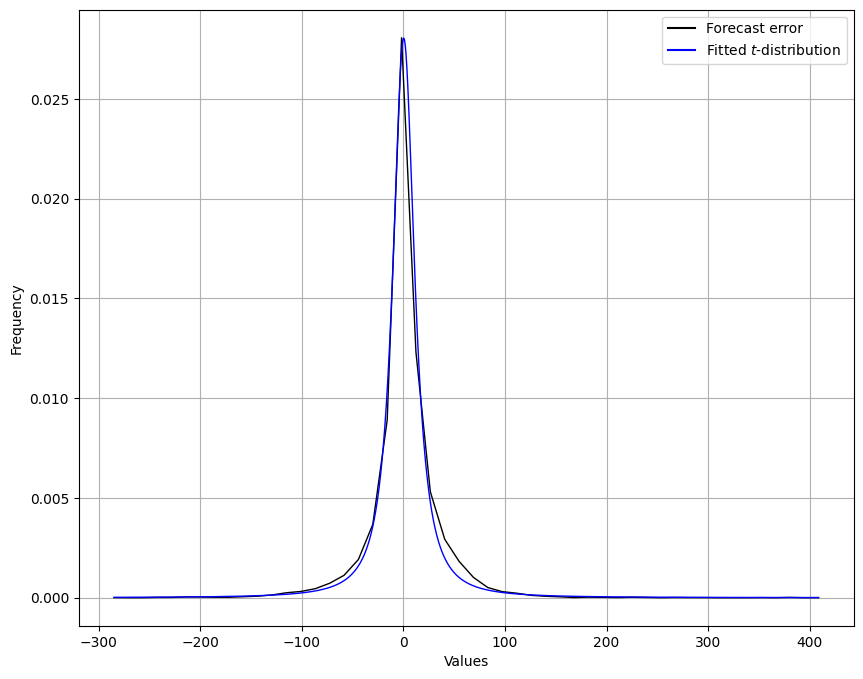

In [17]:

# Initialize model
dist = distfit()

# Find best theoretical distribution for empirical data X
dist.fit_transform(pricedata['error'])
fig, ax = dist.plot()
ax.lines[-1].remove()
ax.lines[-1].remove()
l1 = Line2D([0], [0], color='black', label="Forecast error")
l2 = Line2D([0], [0], color='blue', label="Fitted $t$-distribution")
handles = [l1, l2]
ax.legend(handles=handles)
ax.set_title("")
fig.savefig("price_fit.pdf")

# # Make plot
# fig, ax = dist.plot_summary()
# ax.set_title("")
# ax.set_ylabel("Residuam Sum of Squares (RSS)")
# fig.savefig("price_summary.pdf") 

### Generating

[distfit] >Generate 17520 t distributed samples with fitted params (1.4491729963447435, 0.39017357748618503, 12.091304004963595).


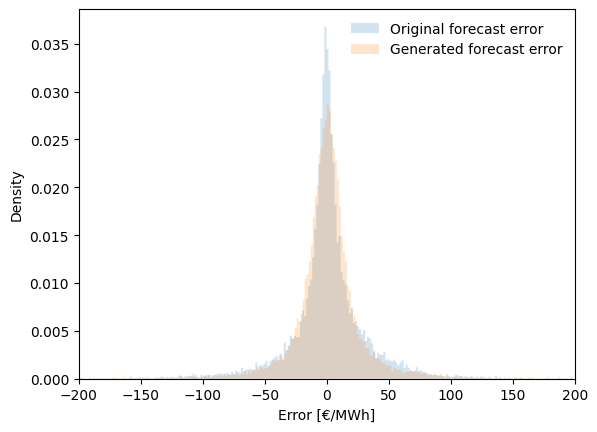

In [18]:
fig, ax = plt.subplots(1, 1)
ax.hist(pricedata['error'], density=True, bins='auto', histtype='stepfilled', alpha=0.2, label="Original forecast error")
ax.hist(dist.generate(2*8760), density=True, bins='auto', histtype='stepfilled', alpha=0.2, label="Generated forecast error")
ax.set_xlim([-200, 200])
ax.set_ylabel("Density")
ax.set_xlabel("Error [€/MWh]")
ax.legend(loc='best', frameon=False)
fig.savefig("price_forecast_error.pdf")
plt.show()